# Part 1

Describe Batch Normalization?

Batch normalization seeks to improve convergence upon the cost/loss function by scaling and shifting the inputs either before or after the activation in each hidden layer. This process allows the model it find the optimal scale and mean of the inputs causing convergence to happen much faster. The trade off, however, is the added complexity to the model and thus more timely predictions. This is typically offset by the decrease in epochs needed to converge but is something that should be considered. It's also worth mentioning that Batch Normalization can be used in lieu of normalizing the inputs before being input.

# Part 2

Create several neural network models investigating the effect of hyperparameters and techniques we studied on the model performance (number of layers, number of neurons in hidden layers, optimizers, batch size and learning rate in the gradient descent optimizers, L1 and L2 regularization, dropout, batch normalization, weight and bias initialization, etc.) using the information provided at
https://keras.io/api/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import models, datasets, layers, optimizers

C:\Users\Josh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


I had some very serious problems with this on my Macbook. Apparently, while Tensorflow itself supports the ARM chipset (M1 Silicon chips in the new Apple products), a majority of the accompanying packages are written in C++, requiring the appropriate compilingfor the MacOS  chipset, which is a pretty involved workaround.

At any rate, the data is assigned below and split into training, validation, and testing sets.

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

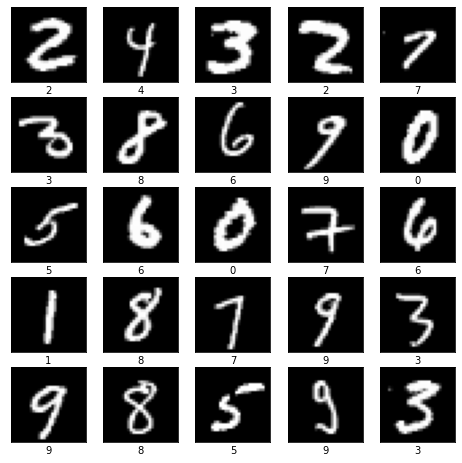

In [3]:
plt.figure(figsize=(8, 8))

for i in range(25,50):
  plt.subplot(5, 5, i-24)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([])

In [4]:
# Normalization
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [5]:
ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5054 - accuracy: 0.8692
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3164 - accuracy: 0.9126
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2925 - accuracy: 0.9186
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2815 - accuracy: 0.9219
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2739 - accuracy: 0.9229


313/313 [==============================] - 0s 937us/step


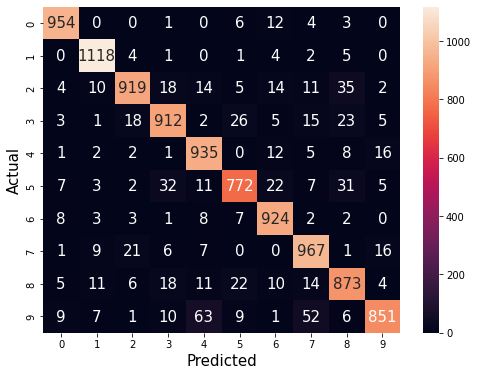

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = ann1.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]


cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.89      0.92      1032
           3       0.91      0.90      0.91      1010
           4       0.89      0.95      0.92       982
           5       0.91      0.87      0.89       892
           6       0.92      0.96      0.94       958
           7       0.90      0.94      0.92      1028
           8       0.88      0.90      0.89       974
           9       0.95      0.84      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



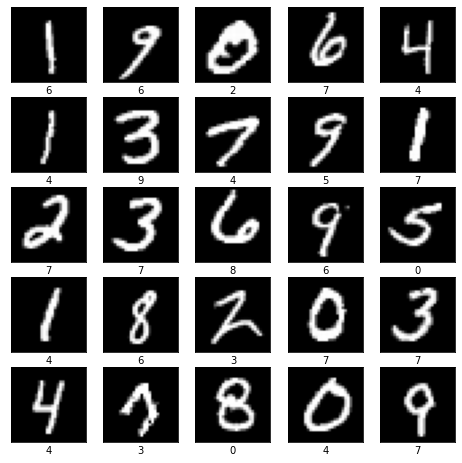

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

As we can see, the model does fairly well recognizing the numbers, but there is room for improvement.

In [ ]:
wrong_guesses = np.where(y_pred_labels != y_test)[0]
wrong_guesses = wrong_guesses[:25]

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[wrong_guesses[i]], cmap="gray")
    plt.xlabel(y_pred_labels[wrong_guesses[i]])
    plt.xticks([])
    plt.yticks([])

A look at the first 25 mislabeled numbers will tell that some guesses were reasonably wrong ie the handwriting is unclear, and some were wrong for reasons unknown. Adding batch normalization and some additional layers may help.

In [55]:
from keras.layers import Dropout, BatchNormalization

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

ann2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2914 - accuracy: 0.9112
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1476 - accuracy: 0.9545
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1176 - accuracy: 0.9628
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0992 - accuracy: 0.9683
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9722


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

313/313 [==============================] - 1s 2ms/step


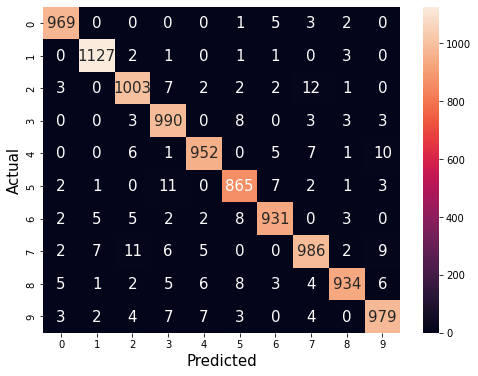

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = ann2.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]


cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

Here, again, we can see there is a relatively great improvement. The model does a splendid job of determining numbers correctly. The lowest accuracy predictions are 5, 8, and 9 which seems reasonable as those numbers look similar to one another. Again, we can see the first 25 misclassified numbers and the models predictions for them.

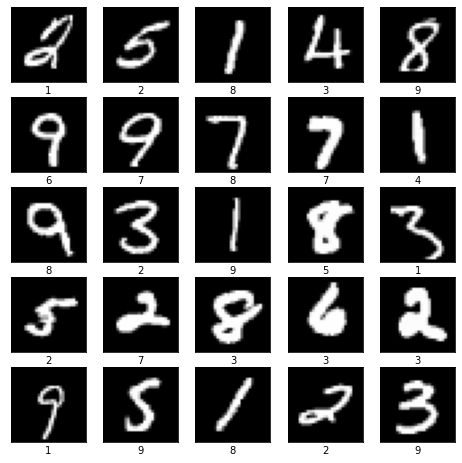

In [58]:
wrong_guesses = np.where(y_pred_labels != y_test)[0]
wrong_guesses = wrong_guesses[25:50]

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[wrong_guesses[i]], cmap="gray")
    plt.xlabel(y_pred_labels[wrong_guesses[i]])
    plt.xticks([])
    plt.yticks([])

In the interest of curiousity, I'm going to make a rather complex network.

In [66]:
ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 0.4054 - accuracy: 0.8742
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2225 - accuracy: 0.9320
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1844 - accuracy: 0.9437
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1609 - accuracy: 0.9508
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1455 - accuracy: 0.9543
